In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv('../data/data_csv.csv')


In [8]:
df.shape

(1985, 28)

In [9]:
df.head(2)

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes


In [72]:
# Checking for duplicates
# Columns 
print(f'Duplicated columns: {df.T.duplicated().any()}')
# Rows 
print(f'Duplicated rows: {df.duplicated().any()}')

Duplicated columns: False
Duplicated rows: False


In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CASE_NO_PATIENT'S,1985.0,993.000000,573.164462,1.0,497.0,993.0,1489.0,1985.0
A1,1985.0,0.299244,0.458042,0.0,0.0,0.0,1.0,1.0
A2,1985.0,0.238287,0.426143,0.0,0.0,0.0,0.0,1.0
A3,1985.0,0.213098,0.409600,0.0,0.0,0.0,0.0,1.0
A4,1985.0,0.272040,0.445123,0.0,0.0,0.0,1.0,1.0
A5,1985.0,0.278589,0.448418,0.0,0.0,0.0,1.0,1.0
A6,1985.0,0.306297,0.461071,0.0,0.0,0.0,1.0,1.0
A7,1985.0,0.345088,0.475517,0.0,0.0,0.0,1.0,1.0
A8,1985.0,0.243829,0.429499,0.0,0.0,0.0,0.0,1.0
A9,1985.0,0.259950,0.438717,0.0,0.0,0.0,1.0,1.0


In [85]:
#Checking Missing Values
df.isna().sum()
# Dropping Missing Values for consistency
df.dropna(inplace=True)

In [86]:
df.isna().sum()

CASE_NO_PATIENT'S                                     0
A1                                                    0
A2                                                    0
A3                                                    0
A4                                                    0
A5                                                    0
A6                                                    0
A7                                                    0
A8                                                    0
A9                                                    0
A10_Autism_Spectrum_Quotient                          0
Social_Responsiveness_Scale                           0
Age_Years                                             0
Qchat_10_Score                                        0
Speech Delay/Language Disorder                        0
Learning disorder                                     0
Genetic_Disorders                                     0
Depression                                      

In [87]:
df2 = df.copy()

In [88]:
# Select Age < 13 years old

df2 = df[df['Age_Years'] <13]
df2.dropna(axis=0, how='any',inplace=True)

C:\Users\CristinaCampos\AppData\Local\Temp\ipykernel_23908\1851309280.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(axis=0, how='any',inplace=True)


In [89]:
df2.shape

(1169, 28)

In [90]:
cat_features = df2.select_dtypes(include=['object'])

In [91]:
cat_features.columns.to_list()

['Speech Delay/Language Disorder',
 'Learning disorder',
 'Genetic_Disorders',
 'Depression',
 'Global developmental delay/intellectual disability',
 'Social/Behavioural Issues',
 'Anxiety_disorder',
 'Sex',
 'Ethnicity',
 'Jaundice',
 'Family_mem_with_ASD',
 'Who_completed_the_test',
 'Target']

In [92]:
# Check caterogical columns
cat_features = []
label_len = []

for i in df.columns:
  if (df[i].dtype == object):
    cat_features.append(i)


for i in cat_features:
  label_len.append(len(df[i].unique()))

cat_frame = pd.DataFrame(data = {'Length': label_len}, index=cat_features)
cat_frame

,Length
Speech Delay/Language Disorder,2
Learning disorder,2
Genetic_Disorders,2
Depression,2
Global developmental delay/intellectual disability,2
Social/Behavioural Issues,2
Anxiety_disorder,2
Sex,2
Ethnicity,16
Jaundice,2


In [94]:
df2.columns

Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'Target'],
      dtype='object')

In [ ]:
## Convert Categorical Values

In [95]:
df3 = pd.get_dummies(df2[['Speech Delay/Language Disorder',
 'Learning disorder',
 'Genetic_Disorders',
 'Depression',
 'Global developmental delay/intellectual disability',
 'Social/Behavioural Issues','Anxiety_disorder',
 'Sex',
 'Ethnicity',
 'Jaundice',
 'Family_mem_with_ASD',
 'Who_completed_the_test',
 'Target']], drop_first=True)

In [96]:
## Correlation
df3.corr()['Target_Yes'].sort_values()


Ethnicity_south asian                                    -0.335904
Ethnicity_asian                                          -0.271422
Ethnicity_Middle Eastern                                 -0.268312
Ethnicity_black                                          -0.039841
Ethnicity_middle eastern                                 -0.013043
Who_completed_the_test_Family member                      0.002375
Who_completed_the_test_Health Care Professional           0.009604
Who_completed_the_test_Self                               0.012743
Ethnicity_Mixed                                           0.018044
Ethnicity_Latino                                          0.022398
Ethnicity_mixed                                           0.026925
Ethnicity_Native Indian                                   0.026925
Ethnicity_PaciFica                                        0.034003
Ethnicity_South Asian                                     0.038639
Ethnicity_Black                                           0.06

In [97]:
## Get features with cor < 0.1
df4 = df3[['Ethnicity_south asian','Ethnicity_asian',                                          
'Ethnicity_Middle Eastern',                                 
'Jaundice_Yes',                               
'Family_mem_with_ASD_Yes',                                   
'Genetic_Disorders_Yes',                                     
'Learning disorder_Yes',                                    
'Depression_Yes',                                            
'Social/Behavioural Issues_Yes',                             
'Anxiety_disorder_Yes',    
'Global developmental delay/intellectual disability_Yes',    
'Speech Delay/Language Disorder_Yes',                        
'Ethnicity_White European',                                  
'Sex_M','Target_Yes'                                                  
]]

In [98]:
df4.shape

(1169, 15)

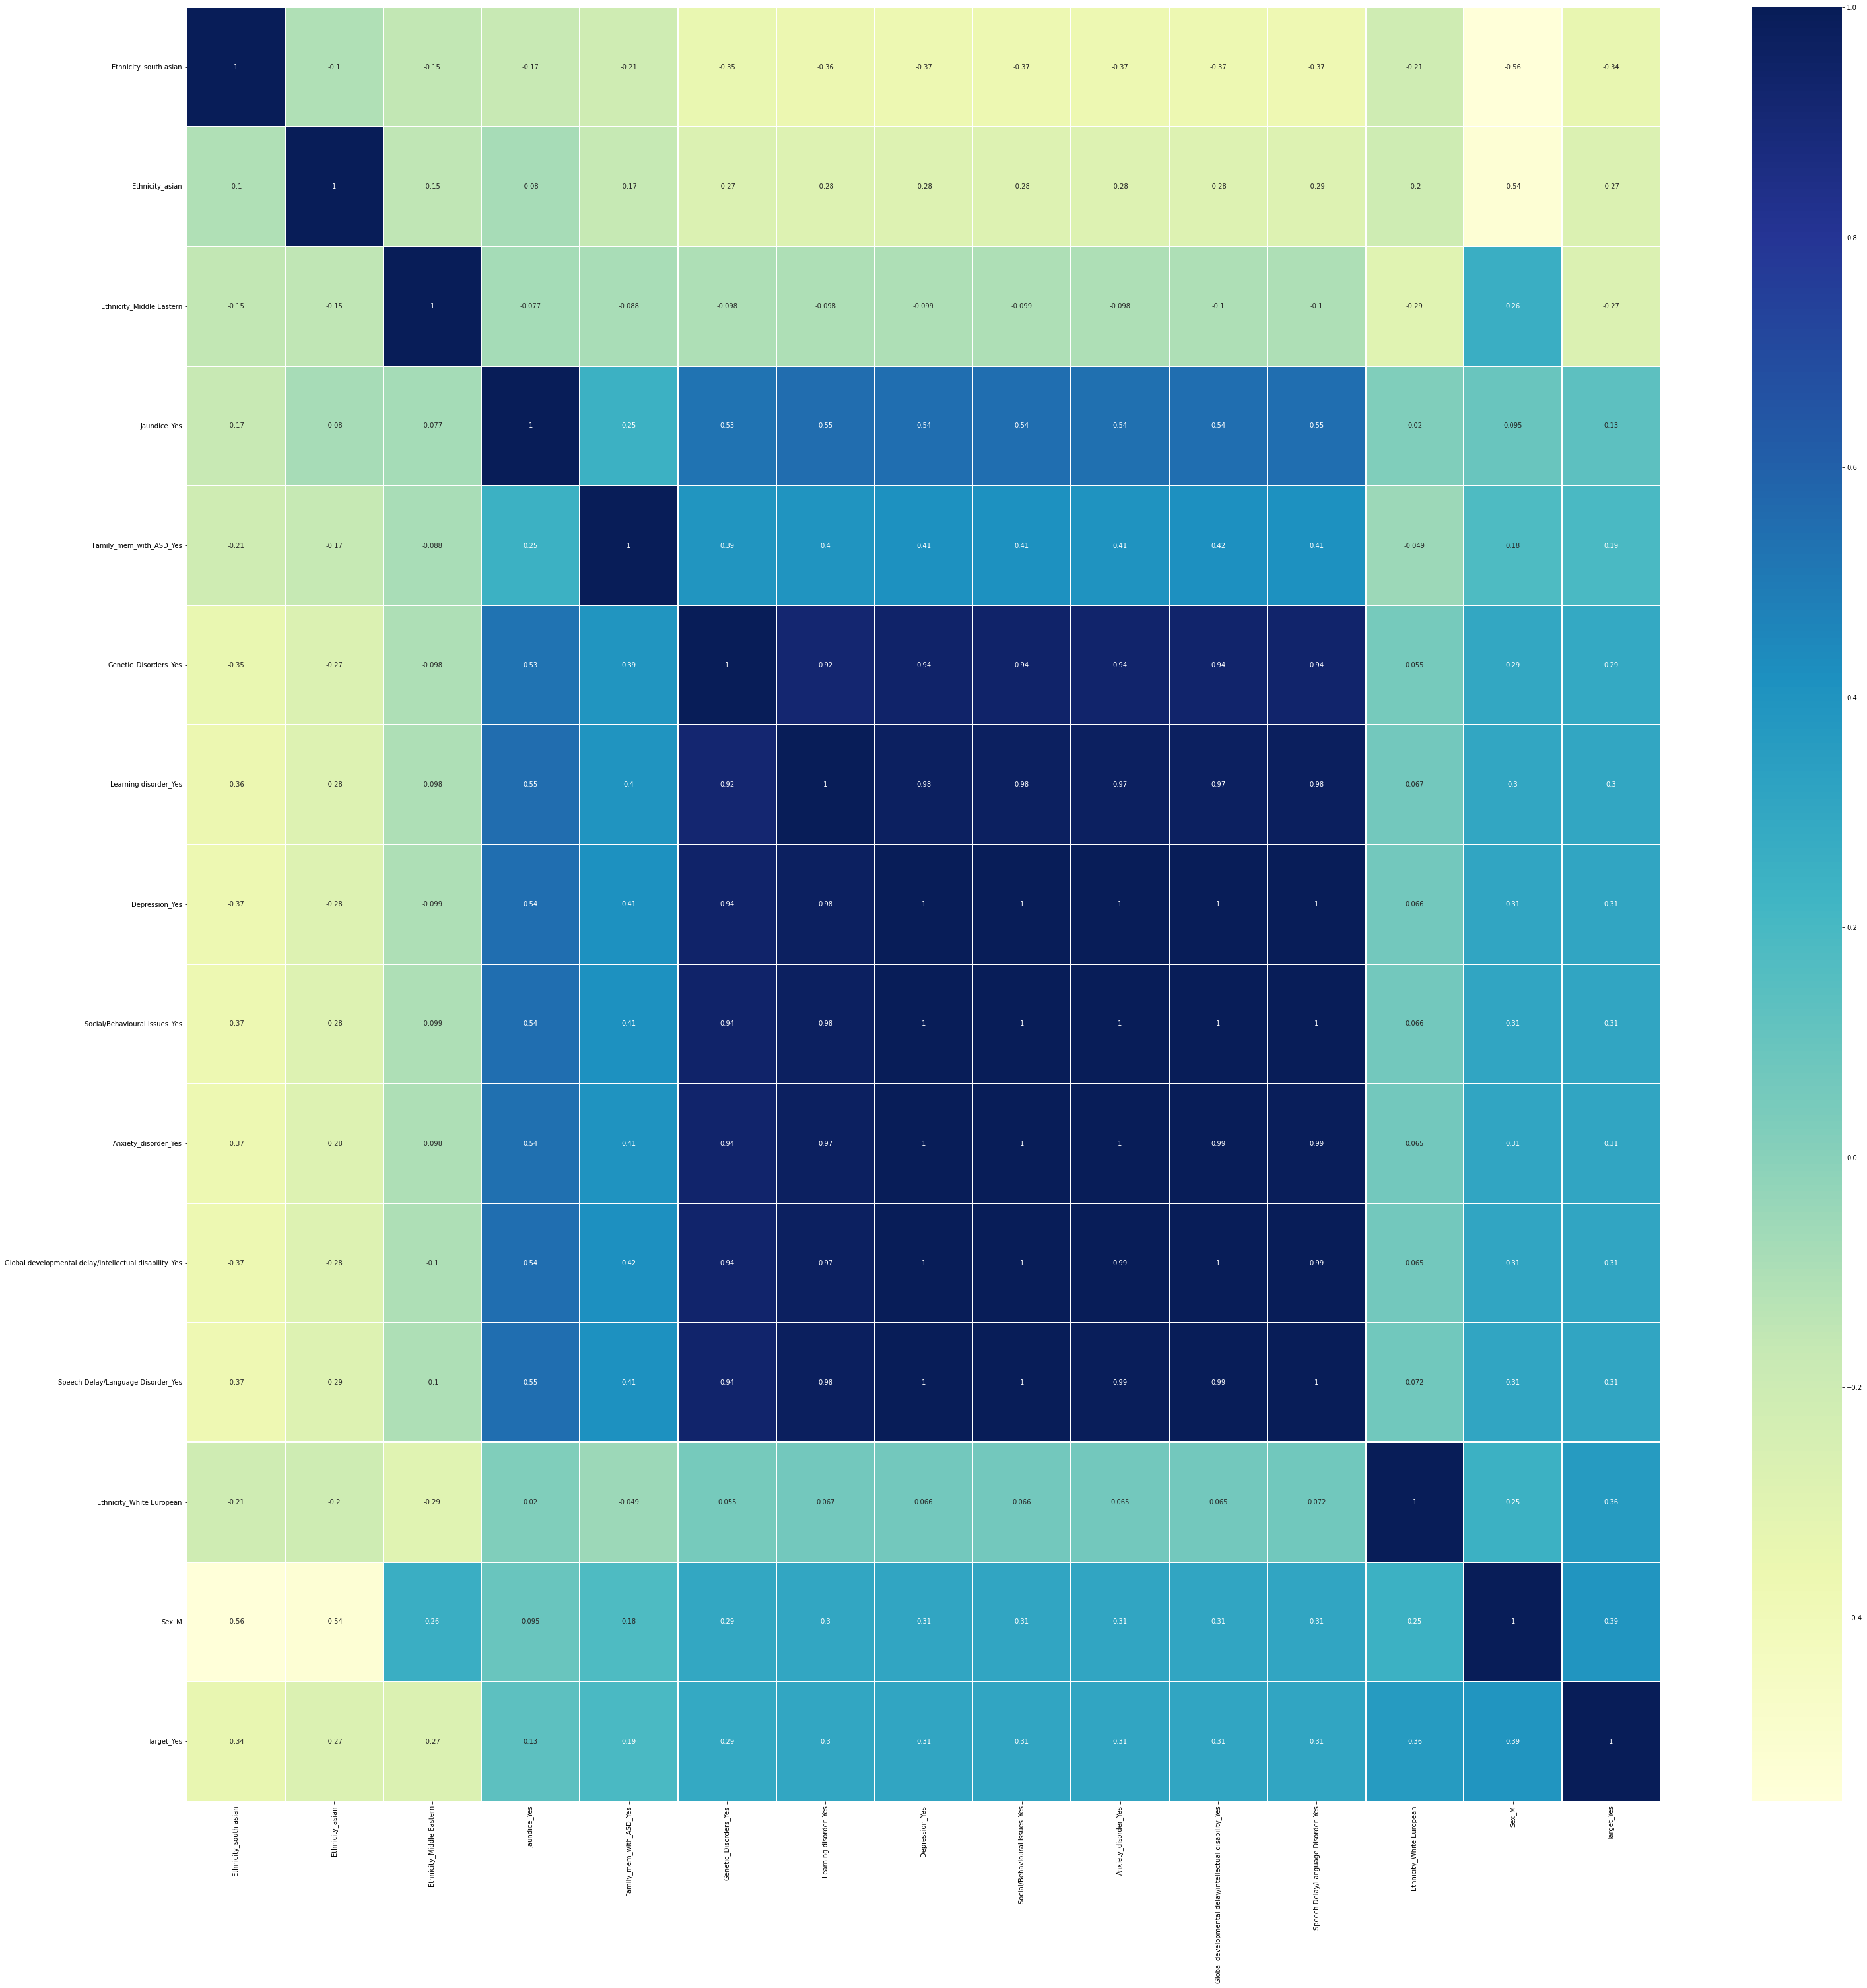

In [99]:
#create the correlation matrix heat map
plt.figure(figsize=(50,50))

sns.heatmap(df4.corr(),linewidths=.1,cmap="YlGnBu", annot=True)

plt.yticks(rotation=0);

Ethnicity_asian                                           0.909324
Ethnicity_south asian                                     0.901625
Ethnicity_Middle Eastern                                  0.823781
Jaundice_Yes                                              0.799829
Sex_M                                                     0.741660
Ethnicity_White European                                  0.712575
Family_mem_with_ASD_Yes                                   0.656972
Learning disorder_Yes                                     0.612489
Speech Delay/Language Disorder_Yes                        0.602224
Global developmental delay/intellectual disability_Yes    0.601369
Depression_Yes                                            0.600513
Social/Behavioural Issues_Yes                             0.600513
Anxiety_disorder_Yes                                      0.598802
Genetic_Disorders_Yes                                     0.570573
Target_Yes                                                0.54

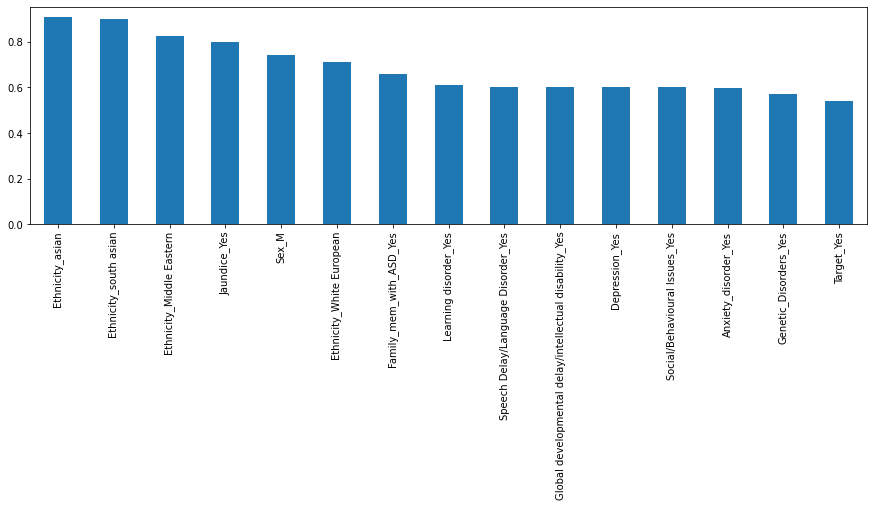

In [100]:
# get most frequent columns 

most_frequent_entry = df4.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = df4.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)


display(df_freq)

df_freq.plot.bar(figsize=(15, 4));

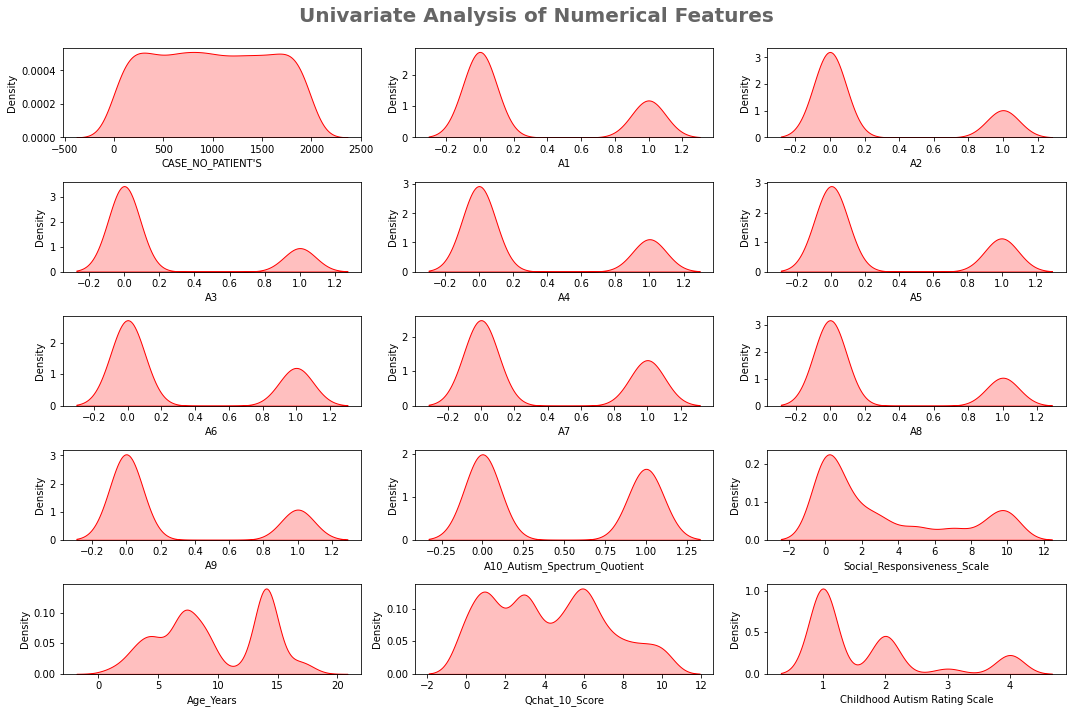

In [101]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.6, y=1.)
for i in range(0, len(numeric_features)):
    plt.subplot(8,3,i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [102]:
df4.rename(columns={'Ethnicity_south asian': 'ethnicity_south_asian',
                   'Ethnicity_asian': 'ethnicity_asian',
                   'Ethnicity_Middle Eastern': 'ethnicity_middle_eastern',
                   'Jaundice_Yes': 'jaundice',
                   'Family_mem_with_ASD_Yes': 'family_mem_with_ASD',
                   'Genetic_Disorders_Yes': 'genetic_disorders',
                   'Learning disorder_Yes': 'learning_disorder',
                   'Depression_Yes':'depression',       
                   'Social/Behavioural Issues_Yes': 'social/behavioural_issues', 
                   'Anxiety_disorder_Yes':'anxiety_disorder',
                   'Global developmental delay/intellectual disability_Yes': 'global_developmental_delay/intellectual_disability',  
                   'Speech Delay/Language Disorder_Yes':'speech_delay/language_disorder',
                   'Ethnicity_White European':'ethnicity_white_european'
                  },
          inplace=True, errors='raise')

C:\Users\CristinaCampos\AppData\Local\Temp\ipykernel_23908\1785941876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.rename(columns={'Ethnicity_south asian': 'ethnicity_south_asian',


In [103]:
df4.isnull().any()

ethnicity_south_asian                                 False
ethnicity_asian                                       False
ethnicity_middle_eastern                              False
jaundice                                              False
family_mem_with_ASD                                   False
genetic_disorders                                     False
learning_disorder                                     False
depression                                            False
social/behavioural_issues                             False
anxiety_disorder                                      False
global_developmental_delay/intellectual_disability    False
speech_delay/language_disorder                        False
ethnicity_white_european                              False
Sex_M                                                 False
Target_Yes                                            False
dtype: bool

In [104]:
df4.to_csv('../data/data_model.csv')